In [1]:
%load_ext autoreload
%autoreload 2

# Move up a directory (until the root of the git repo),
# but only if this has not been done before.
if 'in_correct_dir' not in locals():
    # type: ignore
    %cd -q ..
in_correct_dir = True
%pwd

'/home/wout/pp/code'

array(['brickface', 'cement', 'foliage', 'grass', 'path', 'sky', 'window'],
      dtype=object)

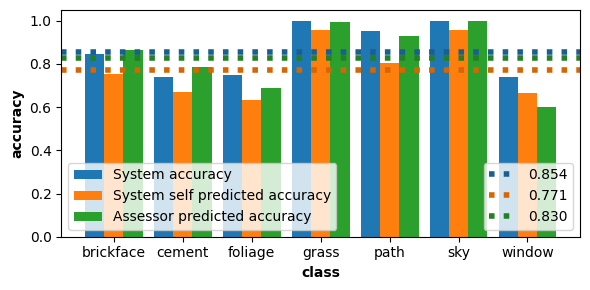

In [53]:
import pandas as pd
import assessors.report as rr
import matplotlib.pyplot as plt
from sklearn import preprocessing

# df = pd.read_csv("artifacts/results/segment_default_k5_wln20/results.csv")
df = pd.read_csv("artifacts/results/segment_default_k4_wln5_syst_id_small/results.csv")
df = rr.wrap.as_classification_with_binary_reward(df)

ds = pd.read_csv("datasets/segment_brodley.csv")
labels = preprocessing.LabelEncoder().fit(ds['class']).classes_
display(labels)

def plot(df, syst_threshold, asss_threshold, syst_id):
    fig, ax = plt.subplots(figsize=(6, 3))
    if syst_id is not None:
        df = df.loc[df.syst_id == syst_id]
    data = rr.plotting.failure_quantification_per_class(df, syst_threshold, asss_threshold)
    rr.plotting.plot_failure_quantification_per_class(ax, data, labels, with_support=False, with_diff=False)
    return fig

# fig = plot(df, syst_threshold=None, asss_threshold=0.5, syst_id=5)
fig = plot(df, syst_threshold=None, asss_threshold=None, syst_id=1)
fig.tight_layout()
fig.savefig("plot.png")

In [60]:
import pandas as pd
import assessors.report as rr
import matplotlib.pyplot as plt
from sklearn import preprocessing

# df = pd.read_csv("artifacts/results/segment_default_k5_wln20/results.csv")
df = pd.read_csv("artifacts/results/segment_default_k4_wln5_syst_id_small/results.csv")
df = rr.wrap.as_classification_with_binary_reward(df)

df.asss_prediction.idxmin()
df.iloc[23]

inst_index                                                      1015
inst_target                                                        2
syst_id                                                            3
syst_features                                                     []
syst_prediction    [[0.31169062852859497, 0.03300943225622177, 0....
syst_pred_loss                                              2.215582
syst_pred_score                                                  0.0
asss_prediction                                             0.252211
asss_pred_loss                                                     0
Name: 23, dtype: object